In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score
print('Finished loading libs')

Finished loading libs


In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')
print(X.shape)
print(Y.shape)
print('finsihed reading data')

(2062, 64, 64)
(2062, 10)
finsihed reading data


In [3]:
print(Y.shape)
print(Y[300])
Y =np.argmax(Y,axis=1)
print(Y[300])
print(Y.shape)


(2062, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
(2062,)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1649, 64, 64)
(413, 64, 64)
(1649,)
(413,)


In [5]:
x_train = x_train.reshape(1649,4096)
x_test = x_test.reshape(413,4096)
print(x_train.shape)
print(x_test.shape)

(1649, 4096)
(413, 4096)


In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_proba = log_reg.predict_proba(x_test)
y_proba

array([[2.32614520e-05, 1.98989249e-09, 4.45646972e-04, ...,
        8.16705659e-03, 6.86287992e-03, 7.87456426e-02],
       [7.66040429e-02, 1.92125657e-03, 2.21805222e-03, ...,
        1.57288152e-01, 7.42730984e-01, 3.46123271e-04],
       [1.22855045e-05, 2.64569812e-05, 2.15899959e-04, ...,
        9.86187711e-01, 6.95124407e-03, 1.10110204e-03],
       ...,
       [9.85807019e-03, 1.38344118e-02, 5.54844720e-02, ...,
        8.49245848e-01, 1.60634524e-02, 2.02669768e-04],
       [9.99990010e-01, 1.85639557e-09, 3.69608571e-06, ...,
        1.11317189e-06, 1.51475259e-08, 1.53920801e-11],
       [7.14271576e-05, 9.35911726e-01, 9.90693987e-03, ...,
        4.44388054e-02, 9.41268935e-03, 2.76743968e-07]])

In [9]:

y_pred = log_reg.predict(x_test)
accVal = accuracy_score(y_test, y_pred)
print(accVal)

0.7820823244552058


# TensorFlow

In [10]:
X = np.load('X.npy')
Y = np.load('Y.npy')
print(X.shape)
print(Y.shape)
print('finsihed reading data')

(2062, 64, 64)
(2062, 10)
finsihed reading data


In [11]:
Y =np.argmax(Y,axis=1)
print(Y.shape)

(2062,)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1649, 64, 64)
(413, 64, 64)
(1649,)
(413,)


In [13]:
x_train1 = x_train.reshape(1649,4096)
x_test1 = x_test.reshape(413,4096)
print(x_train.shape)
print(x_test.shape)

(1649, 64, 64)
(413, 64, 64)


In [14]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=4096)
softmax_reg.fit(x_train1, y_train)

LogisticRegression(max_iter=4096, multi_class='multinomial')

In [15]:
print( softmax_reg.score(x_test1, y_test) )
print( softmax_reg.score(x_train1, y_train) )

0.7723970944309927
1.0


In [16]:
y_pred = softmax_reg.predict(x_test1)
accVal = accuracy_score(y_test, y_pred)
print(accVal)

0.7723970944309927


In [17]:
model = keras.models.Sequential()
print("Initialized model")
model.add(keras.layers.Flatten(input_shape=[64, 64]))
print('Finsihed setting the input layer')
model.add(keras.layers.Dense(64, activation="relu"))
print("Added hidden layer 1")
model.add(keras.layers.Dense(64, activation="relu"))
print('Added hidden layer 2')
model.add(keras.layers.Dense(10, activation='softmax'))
print("Added output layer")

Initialized model
Finsihed setting the input layer
Added hidden layer 1
Added hidden layer 2
Added output layer


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 267,018
Trainable params: 267,018
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", 
              metrics = ['accuracy'])
print("Finished compiling")

Finished compiling


In [20]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
print(y_train_categorical.shape)
print("Finished categorizing the labels (output)")

(1649, 10)
Finished categorizing the labels (output)


In [21]:
history = model.fit(
  x_train,
  y_train_categorical,
  epochs=5,
  batch_size=32,
  verbose=True
)

Epoch 1/5
52/52 [==============================] - 1s 4ms/step - loss: 2.2627 - accuracy: 0.1546
Epoch 2/5
52/52 [==============================] - 0s 5ms/step - loss: 2.1554 - accuracy: 0.2814
Epoch 3/5
52/52 [==============================] - 0s 6ms/step - loss: 2.0104 - accuracy: 0.3620
Epoch 4/5
52/52 [==============================] - 0s 5ms/step - loss: 1.8653 - accuracy: 0.4215
Epoch 5/5
52/52 [==============================] - 0s 4ms/step - loss: 1.6994 - accuracy: 0.4906


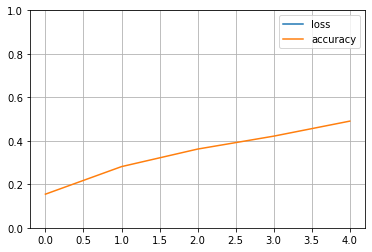

In [22]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [23]:
model.evaluate(
  x_test,
  to_categorical(y_test)
)

13/13 [==============================] - 0s 3ms/step - loss: 1.6267 - accuracy: 0.5157


[1.6266696453094482, 0.5157384872436523]

In [24]:
print(y_test.shape)

(413,)


In [25]:
# Predict on the  5 test images.
predictions = model.predict(x_test[40:46])
print(predictions)

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [3 8 5 8 8 8]

# Check our predictions against the ground truths.
print("Check the truth")
print(y_test[40:46]) # [3 8 5 2 7 8]

[[0.01045065 0.1689739  0.07932071 0.4230898  0.02614888 0.12680481
  0.04192149 0.01512054 0.02760345 0.08056588]
 [0.01980518 0.04613183 0.079003   0.11070027 0.08713692 0.09218696
  0.1464869  0.10727827 0.15566534 0.1556054 ]
 [0.03564032 0.1849739  0.11517726 0.264671   0.05009289 0.08344873
  0.06810725 0.04056863 0.0714408  0.08587909]
 [0.02730331 0.24259338 0.292318   0.14439753 0.04095463 0.01595383
  0.08293919 0.06219902 0.05624957 0.03509167]
 [0.03219179 0.13130629 0.09822478 0.06546103 0.09474081 0.02012998
  0.1095906  0.24781637 0.13973725 0.06080104]
 [0.04071762 0.16548258 0.1255416  0.06562731 0.07821777 0.02137278
  0.09957669 0.18986276 0.17845006 0.03515089]]
[3 8 3 2 7 7]
Check the truth
[3 8 5 2 7 8]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.86      0.86      0.86        44
           2       0.74      0.73      0.74        44
           3       0.78      0.91      0.84        35
           4       0.58      0.67      0.62        42
           5       0.93      0.88      0.90        42
           6       0.65      0.76      0.70        37
           7       0.81      0.55      0.66        47
           8       0.73      0.90      0.80        39
           9       0.91      0.77      0.83        39

    accuracy                           0.77       413
   macro avg       0.78      0.78      0.77       413
weighted avg       0.78      0.77      0.77       413

